# House Price Prediction

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loding the dataset

In [56]:
data=pd.read_csv("housing.csv")

In [57]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Exploration

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [59]:
data.dropna(inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [61]:
from sklearn.model_selection import train_test_split

X= data.drop(['median_house_value'],axis=1)
y= data['median_house_value']

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [78]:
train_data=X_train.join(y_train)

In [79]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3993,-118.57,34.18,36.0,2981.0,441.0,1243.0,413.0,6.5304,<1H OCEAN,439800.0
15707,-122.43,37.79,50.0,3312.0,1095.0,1475.0,997.0,2.7165,NEAR BAY,500001.0
15759,-122.44,37.77,52.0,2994.0,736.0,1428.0,700.0,3.0766,NEAR BAY,438900.0
5883,-118.34,34.17,52.0,1133.0,212.0,545.0,222.0,4.8750,<1H OCEAN,249500.0
13877,-117.31,34.43,16.0,5130.0,1172.0,3126.0,1046.0,1.6784,INLAND,71900.0
...,...,...,...,...,...,...,...,...,...,...
19073,-122.49,38.31,27.0,3078.0,597.0,1411.0,586.0,3.2500,<1H OCEAN,195500.0
5545,-118.40,33.97,37.0,1364.0,248.0,494.0,242.0,4.6364,<1H OCEAN,456300.0
1527,-122.08,37.90,29.0,4133.0,770.0,1691.0,744.0,5.1097,NEAR BAY,288000.0
6384,-118.05,34.16,41.0,3320.0,713.0,1236.0,659.0,3.5694,INLAND,278600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

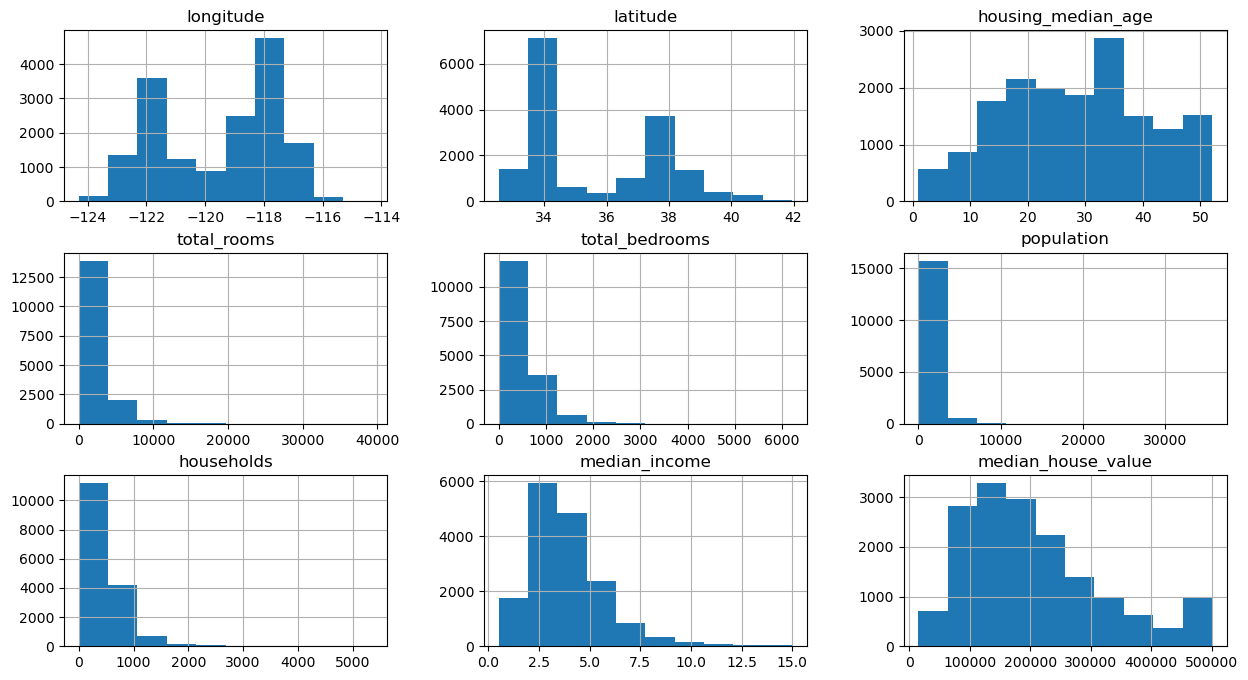

In [80]:
train_data.hist(figsize=(15,8) )

# Correlation

<Figure size 1500x800 with 0 Axes>

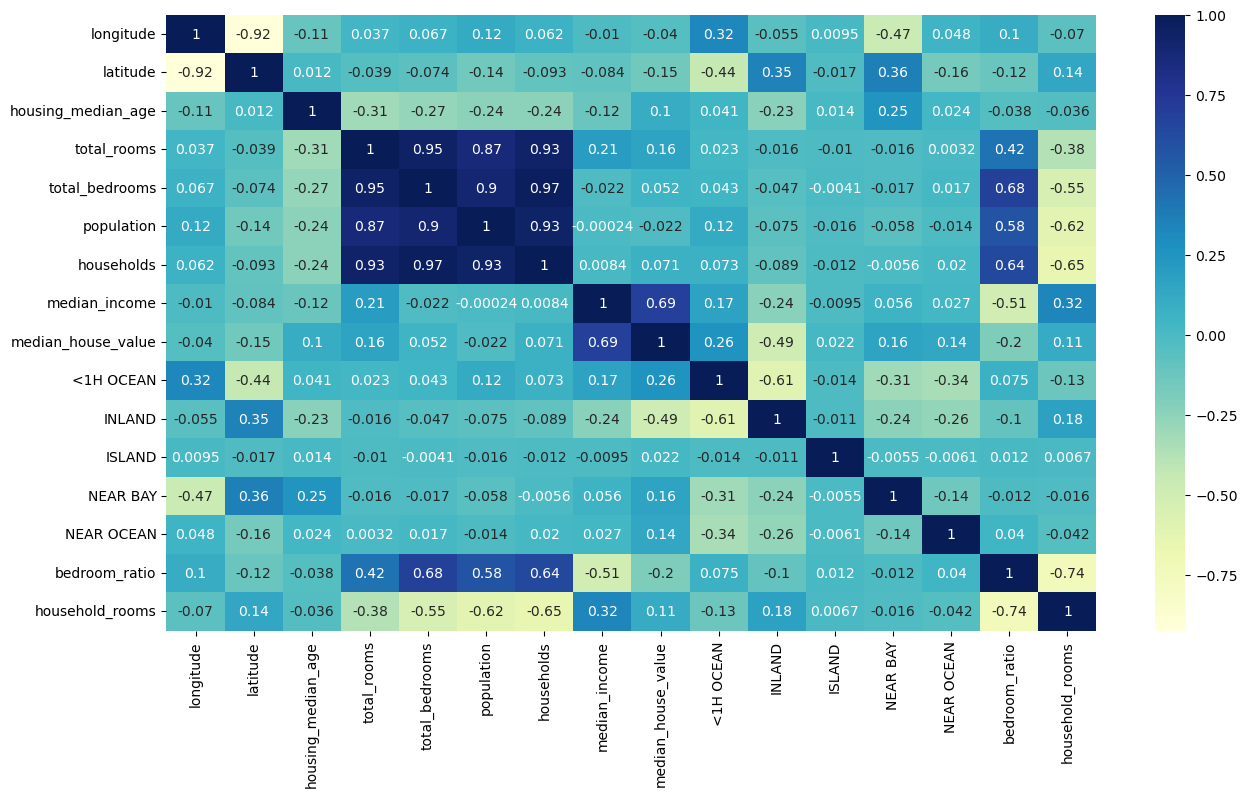

<Figure size 1500x800 with 0 Axes>

In [104]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

# Data preprocessing

In [82]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

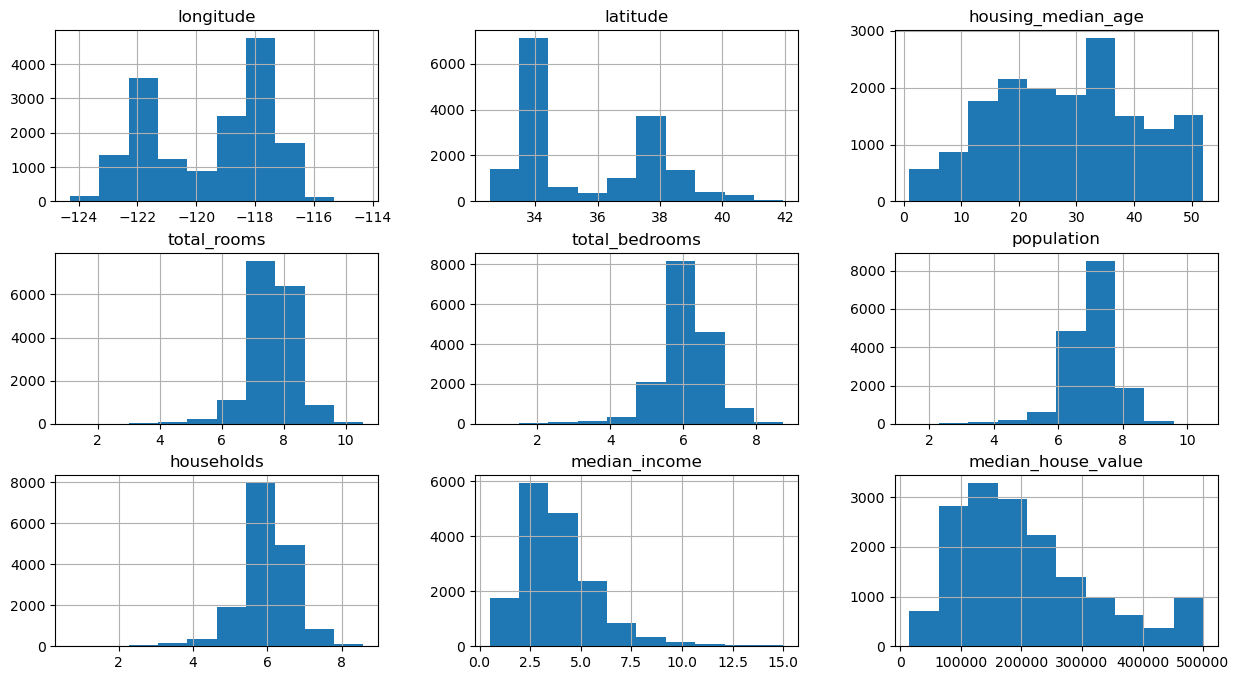

In [83]:
train_data.hist(figsize=(15,8) )

In [84]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [85]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3993,-118.57,34.18,36.0,8.000349,6.091310,7.126087,6.025866,6.5304,439800.0,1,0,0,0,0
15707,-122.43,37.79,50.0,8.105609,6.999422,7.297091,6.905753,2.7165,500001.0,0,0,0,1,0
15759,-122.44,37.77,52.0,8.004700,6.602588,7.264730,6.552508,3.0766,438900.0,0,0,0,1,0
5883,-118.34,34.17,52.0,7.033506,5.361292,6.302619,5.407172,4.8750,249500.0,1,0,0,0,0
13877,-117.31,34.43,16.0,8.543056,7.067320,8.047829,6.953684,1.6784,71900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19073,-122.49,38.31,27.0,8.032360,6.393591,7.252762,6.375025,3.2500,195500.0,1,0,0,0,0
5545,-118.40,33.97,37.0,7.218910,5.517453,6.204558,5.493061,4.6364,456300.0,1,0,0,0,0
1527,-122.08,37.90,29.0,8.327001,6.647688,7.433667,6.613384,5.1097,288000.0,0,0,0,1,0
6384,-118.05,34.16,41.0,8.108021,6.570883,7.120444,6.492240,3.5694,278600.0,0,1,0,0,0


# Correlation

<Axes: >

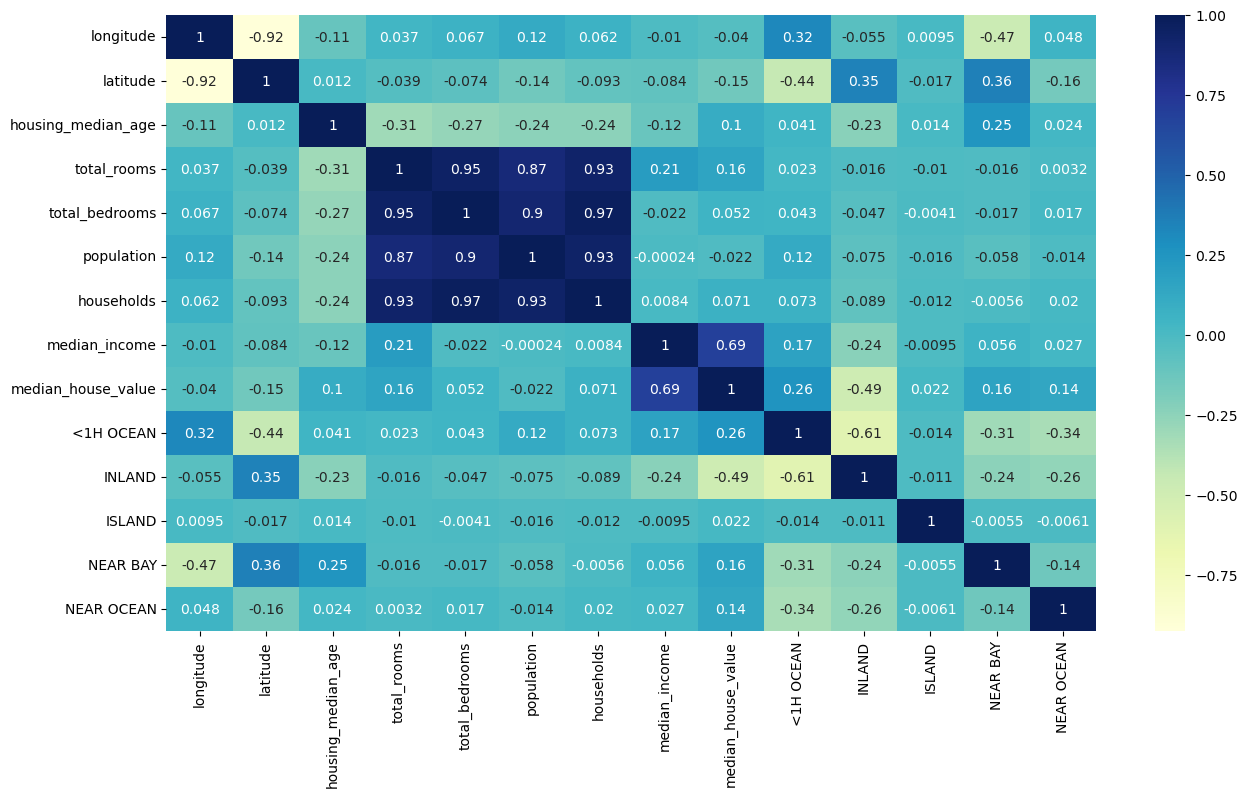

In [86]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

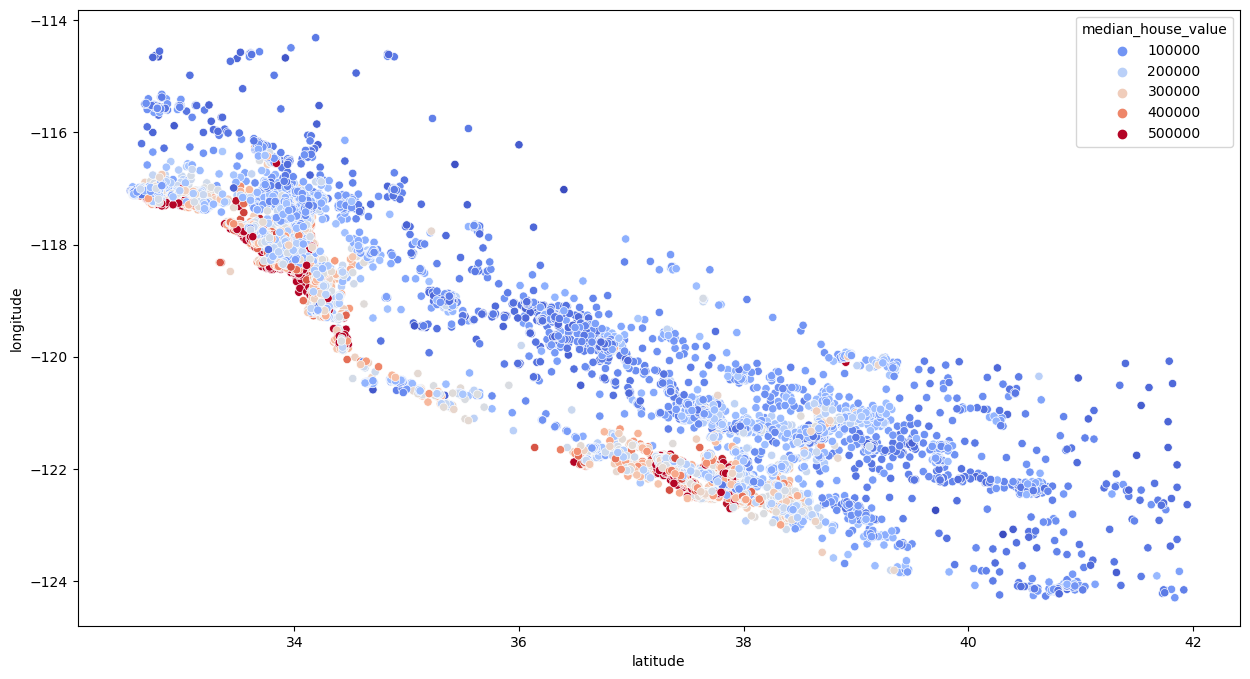

In [88]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

#Dark Red=More expensive
#Dark Blue=More cheap

# Feature Engineering

<Axes: >

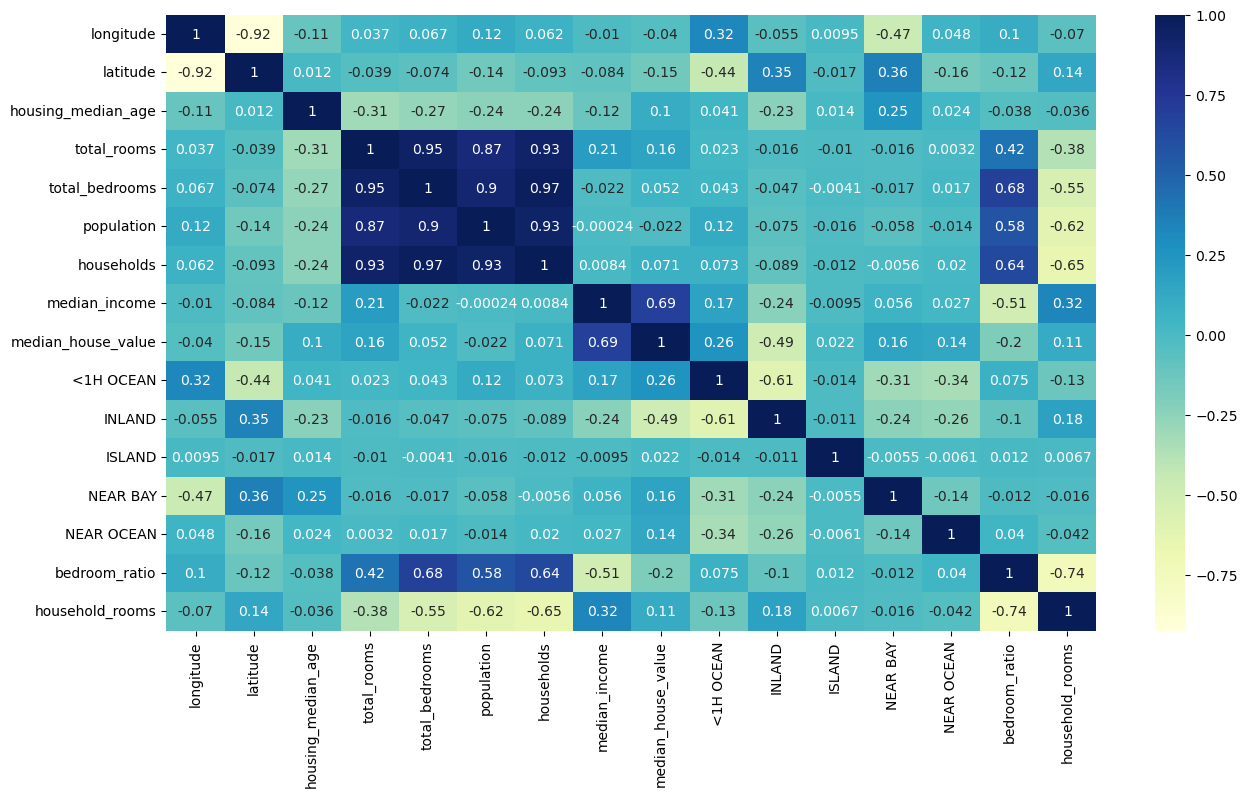

In [89]:
train_data['bedroom_ratio'] =train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

# Linear regression model

In [90]:
from sklearn.linear_model import LinearRegression

X_train,y_train =train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
reg= LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [91]:
test_data=X_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] =test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [92]:
X_test,y_test =test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [93]:
reg.score(X_test,y_test)

0.6818061312508426

# Random Forest Model

In [96]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [99]:
forest.score(X_test,y_test)

0.8313303176604454